# 278k Emotion Labeled Spotify Songs

About Dataset
Moodify Dataset
The main idea of Moodify project is to classify songs not only based on their lyrical and musical features, but also incorporating emotions, in order to provide users with more successful recommendation outputs. Moodify aims to categorize songs into four main emotions and utilize the similarities in musical features within these categories to offer users more effective recommendations, weighting them with emotions.

In this perspective, we build LGBM model to predict emotions of songs and we use this dataset in our both test and recommendation phases. It contains nearly 278.000 songs from Spotify and all songs emotionally labeled.

Additional information about variables:
Labels: {'sad': 0, 'happy': 1, 'energetic': 2, 'calm': 3}

Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

Instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides a strong likelihood that the track is live.

Loudness: the overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing the relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

Speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audiobook, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, the tempo is the speed or pace of a given piece and derives directly from the average beat duration.

## Objectives of the Project
1. Analyze the data
2. Train multiple models on this data. 
3. Create data pipeline
4. Create a presentation slide to present your work. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df =  pd.read_csv ('278k_labelled_uri.csv')

In [3]:
df.head()

Unnamed: 0.1  Unnamed: 0  duration (ms)  danceability  energy  loudness  \
0             0           0       195000.0         0.611   0.614    -8.815   
1             1           1       194641.0         0.638   0.781    -6.848   
2             2           2       217573.0         0.560   0.810    -8.029   
3             3           3       443478.0         0.525   0.699    -4.571   
4             4           4       225862.0         0.367   0.771    -5.863   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0672        0.0169          0.000794    0.7530    0.520  128.050   
1       0.0285        0.0118          0.009530    0.3490    0.250  122.985   
2       0.0872        0.0071          0.000008    0.2410    0.247  170.044   
3       0.0353        0.0178          0.000088    0.0888    0.199   92.011   
4       0.1060        0.3650          0.000001    0.0965    0.163  115.917   

      spec_rate  labels                                   uri  
0  3.446154e-07       2  spotify:track:3v6sBj3swihU8pXQQHhDZo  
1  1.464234e-07       1  spotify:track:7KCWmFdw0TzoJbKtqRRzJO  
2  4.007850e-07       1  spotify:track:2CY92qejUrhyPUASawNVRr  
3  7.959809e-08       0  spotify:track:11BPfwVbB7vok7KfjBeW4k  
4  4.693131e-07       1  spotify:track:3yUJKPsjvThlcQWTS9ttYx

In [4]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'duration (ms)', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'spec_rate', 'labels', 'uri'],
      dtype='object')

In [5]:
#drop unwanted columns
columns = ['Unnamed: 0.1', 'Unnamed: 0', 'uri' ]
df.drop(columns = columns, inplace =  True)

In [6]:
df.head()

duration (ms)  danceability  energy  loudness  speechiness  acousticness  \
0       195000.0         0.611   0.614    -8.815       0.0672        0.0169   
1       194641.0         0.638   0.781    -6.848       0.0285        0.0118   
2       217573.0         0.560   0.810    -8.029       0.0872        0.0071   
3       443478.0         0.525   0.699    -4.571       0.0353        0.0178   
4       225862.0         0.367   0.771    -5.863       0.1060        0.3650   

   instrumentalness  liveness  valence    tempo     spec_rate  labels  
0          0.000794    0.7530    0.520  128.050  3.446154e-07       2  
1          0.009530    0.3490    0.250  122.985  1.464234e-07       1  
2          0.000008    0.2410    0.247  170.044  4.007850e-07       1  
3          0.000088    0.0888    0.199   92.011  7.959809e-08       0  
4          0.000001    0.0965    0.163  115.917  4.693131e-07       1

In [7]:
# EXAMINE THE DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277938 entries, 0 to 277937
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration (ms)     277938 non-null  float64
 1   danceability      277938 non-null  float64
 2   energy            277938 non-null  float64
 3   loudness          277938 non-null  float64
 4   speechiness       277938 non-null  float64
 5   acousticness      277938 non-null  float64
 6   instrumentalness  277938 non-null  float64
 7   liveness          277938 non-null  float64
 8   valence           277938 non-null  float64
 9   tempo             277938 non-null  float64
 10  spec_rate         277938 non-null  float64
 11  labels            277938 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 25.4 MB


In [8]:
#Checking for null values
df.isna().sum()

duration (ms)       0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
spec_rate           0
labels              0
dtype: int64

In [9]:
# Checking for duplicate 
df.duplicated().sum()

1678

In [10]:
# Removing Duplicate
df.drop_duplicates(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276260 entries, 0 to 277937
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration (ms)     276260 non-null  float64
 1   danceability      276260 non-null  float64
 2   energy            276260 non-null  float64
 3   loudness          276260 non-null  float64
 4   speechiness       276260 non-null  float64
 5   acousticness      276260 non-null  float64
 6   instrumentalness  276260 non-null  float64
 7   liveness          276260 non-null  float64
 8   valence           276260 non-null  float64
 9   tempo             276260 non-null  float64
 10  spec_rate         276260 non-null  float64
 11  labels            276260 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 27.4 MB


#### There is no null value and all columns are numerical

## Exploratory Data Analysis

In [12]:
# converting duration column from ms to minutes
df['duration(m)'] = df['duration (ms)'] / 60000

In [13]:
# drop the initial duratio column
df.drop(columns ='duration (ms)', axis=1, inplace = True)
df.head()

danceability  energy  loudness  speechiness  acousticness  \
0         0.611   0.614    -8.815       0.0672        0.0169   
1         0.638   0.781    -6.848       0.0285        0.0118   
2         0.560   0.810    -8.029       0.0872        0.0071   
3         0.525   0.699    -4.571       0.0353        0.0178   
4         0.367   0.771    -5.863       0.1060        0.3650   

   instrumentalness  liveness  valence    tempo     spec_rate  labels  \
0          0.000794    0.7530    0.520  128.050  3.446154e-07       2   
1          0.009530    0.3490    0.250  122.985  1.464234e-07       1   
2          0.000008    0.2410    0.247  170.044  4.007850e-07       1   
3          0.000088    0.0888    0.199   92.011  7.959809e-08       0   
4          0.000001    0.0965    0.163  115.917  4.693131e-07       1   

   duration(m)  
0     3.250000  
1     3.244017  
2     3.626217  
3     7.391300  
4     3.764367

In [14]:
# Checking for statistics of the dataset to extract vital information
df.describe()

danceability         energy       loudness    speechiness  \
count  276260.000000  276260.000000  276260.000000  276260.000000   
mean        0.552509       0.556614     -10.370273       0.087960   
std         0.188941       0.279694       6.672366       0.112613   
min         0.000000       0.000000     -60.000000       0.000000   
25%         0.431000       0.341000     -12.756000       0.035900   
50%         0.571000       0.591000      -8.406000       0.047100   
75%         0.693000       0.792000      -5.848000       0.082300   
max         0.989000       1.000000       4.882000       0.965000   

        acousticness  instrumentalness       liveness        valence  \
count  276260.000000     276260.000000  276260.000000  276260.000000   
mean        0.386906          0.255386       0.189151       0.449543   
std         0.364564          0.373908       0.163513       0.267527   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.033900          0.000000       0.096200       0.220000   
50%         0.263000          0.001100       0.121000       0.434000   
75%         0.754000          0.647000       0.226000       0.665000   
max         0.996000          1.000000       1.000000       1.000000   

               tempo     spec_rate         labels    duration(m)  
count  276260.000000  2.762600e+05  276260.000000  276260.000000  
mean      119.190571  4.758558e-07       1.179049       3.873701  
std        30.473167  9.202471e-07       1.021453       1.950287  
min         0.000000  0.000000e+00       0.000000       0.111767  
25%        95.066750  1.531601e-07       0.000000       2.866667  
50%       119.936000  2.346238e-07       1.000000       3.550883  
75%       138.852000  4.454110e-07       2.000000       4.414092  
max       244.947000  5.971860e-05       3.000000      65.331583

In [15]:
#converting labels columns to categorical for easy analysis
def label(x):
    if x == 0:
        return 'sad'
    elif x == 1:
        return 'happy'
    elif x == 2:
        return 'energetic'
    else:
        return 'calm'
    

In [16]:
# Applying the function to the label columns
df['cat_label'] = df['labels'].apply(label)

In [17]:
df

danceability  energy  loudness  speechiness  acousticness  \
0              0.611   0.614    -8.815       0.0672       0.01690   
1              0.638   0.781    -6.848       0.0285       0.01180   
2              0.560   0.810    -8.029       0.0872       0.00710   
3              0.525   0.699    -4.571       0.0353       0.01780   
4              0.367   0.771    -5.863       0.1060       0.36500   
...              ...     ...       ...          ...           ...   
277933         0.777   0.725    -9.012       0.0470       0.12600   
277934         0.543   0.482   -12.789       0.1940       0.08530   
277935         0.527   0.942    -5.640       0.0366       0.01150   
277936         0.768   0.829    -5.109       0.0313       0.09640   
277937         0.779   0.870   -13.141       0.0574       0.00644   

        instrumentalness  liveness  valence    tempo     spec_rate  labels  \
0               0.000794    0.7530    0.520  128.050  3.446154e-07       2   
1               0.009530    0.3490    0.250  122.985  1.464234e-07       1   
2               0.000008    0.2410    0.247  170.044  4.007850e-07       1   
3               0.000088    0.0888    0.199   92.011  7.959809e-08       0   
4               0.000001    0.0965    0.163  115.917  4.693131e-07       1   
...                  ...       ...      ...      ...           ...     ...   
277933          0.010800    0.0917    0.851  128.349  1.700680e-07       1   
277934          0.000092    0.1110    0.415  193.513  6.812444e-07       1   
277935          0.000000    0.1880    0.495  148.723  1.516740e-07       2   
277936          0.000029    0.0970    0.962  118.773  1.335706e-07       1   
277937          0.010700    0.0399    0.555  102.689  2.372685e-07       1   

        duration(m)  cat_label  
0          3.250000  energetic  
1          3.244017      happy  
2          3.626217      happy  
3          7.391300        sad  
4          3.764367      happy  
...             ...        ...  
277933     4.606000      happy  
277934     4.746217      happy  
277935     4.021783  energetic  
277936     3.905550      happy  
277937     4.032000      happy  

[276260 rows x 13 columns]

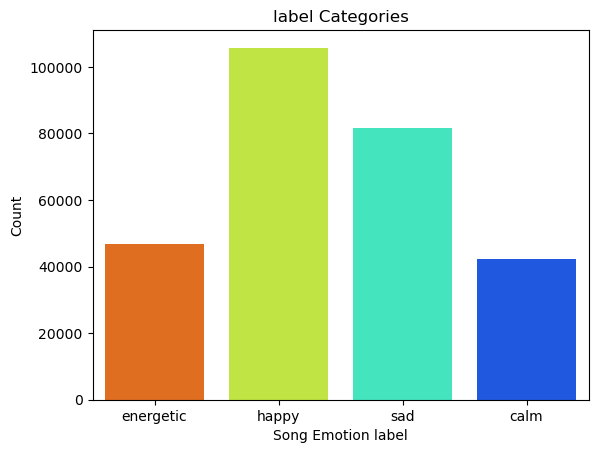

In [18]:
sns.countplot(df['cat_label'], palette= 'jet_r')
plt.title('label Categories')
plt.xlabel('Song Emotion label')
plt.ylabel('Count')
plt.show()  

##### happy and sad sound music category dominate most of the dataset

In [19]:
df.groupby('cat_label')['cat_label'].count()

cat_label
calm          42188
energetic     46716
happy        105728
sad           81628
Name: cat_label, dtype: int64

In [20]:
df.groupby('cat_label')['loudness'].count()

cat_label
calm          42188
energetic     46716
happy        105728
sad           81628
Name: loudness, dtype: int64

In [21]:
df.groupby('cat_label')['duration(m)'].sum()

cat_label
calm         147436.101433
energetic    182415.189000
happy        391397.653700
sad          348899.693883
Name: duration(m), dtype: float64

In [22]:
df.groupby('cat_label')['danceability'].count()

cat_label
calm          42188
energetic     46716
happy        105728
sad           81628
Name: danceability, dtype: int64

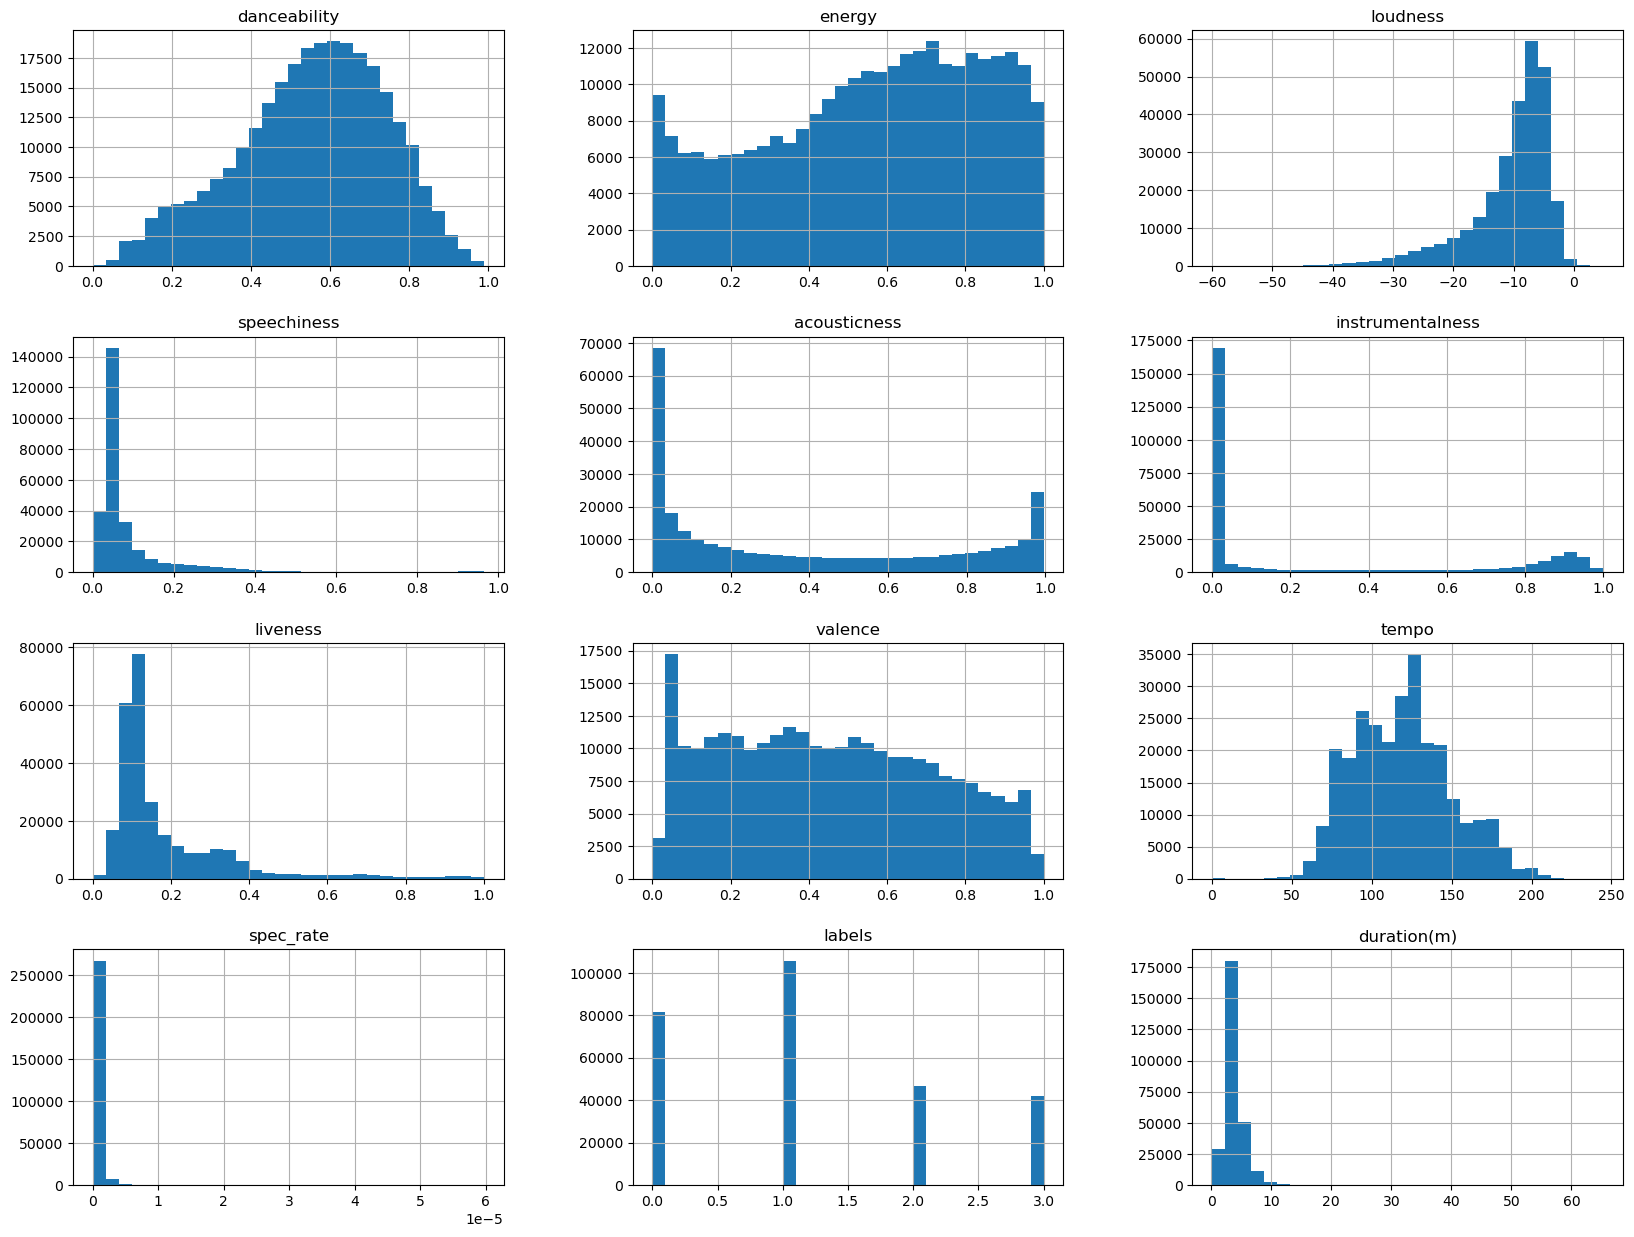

In [23]:
#distribution plot of numerical columns
df.hist(bins=30, figsize=(20, 15))
plt.show()

Text(0.5, 1.0, 'liveness')

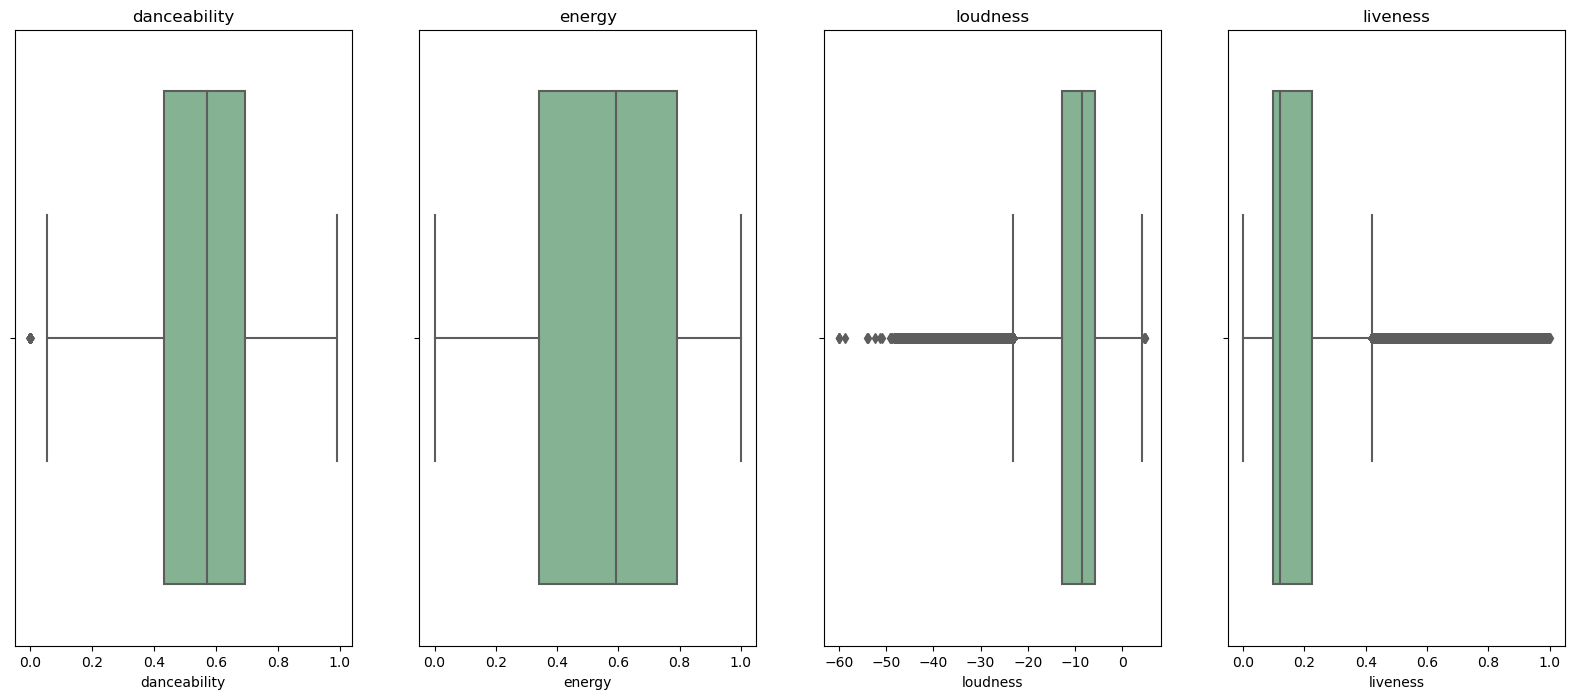

In [24]:
#checking for outliers in the data using boxplot
sns.set_palette('crest')
fig, axes = plt.subplots(1, 4, figsize=(20, 8))

sns.boxplot(data = df, x='danceability', ax=axes[0])
axes[0].set_title('danceability')

sns.boxplot(data = df, x='energy', ax=axes[1])
axes[1].set_title('energy')

sns.boxplot(data = df, x='loudness', ax=axes[2])
axes[2].set_title('loudness')
            
sns.boxplot(data = df, x='liveness', ax=axes[3])
axes[3].set_title('liveness')


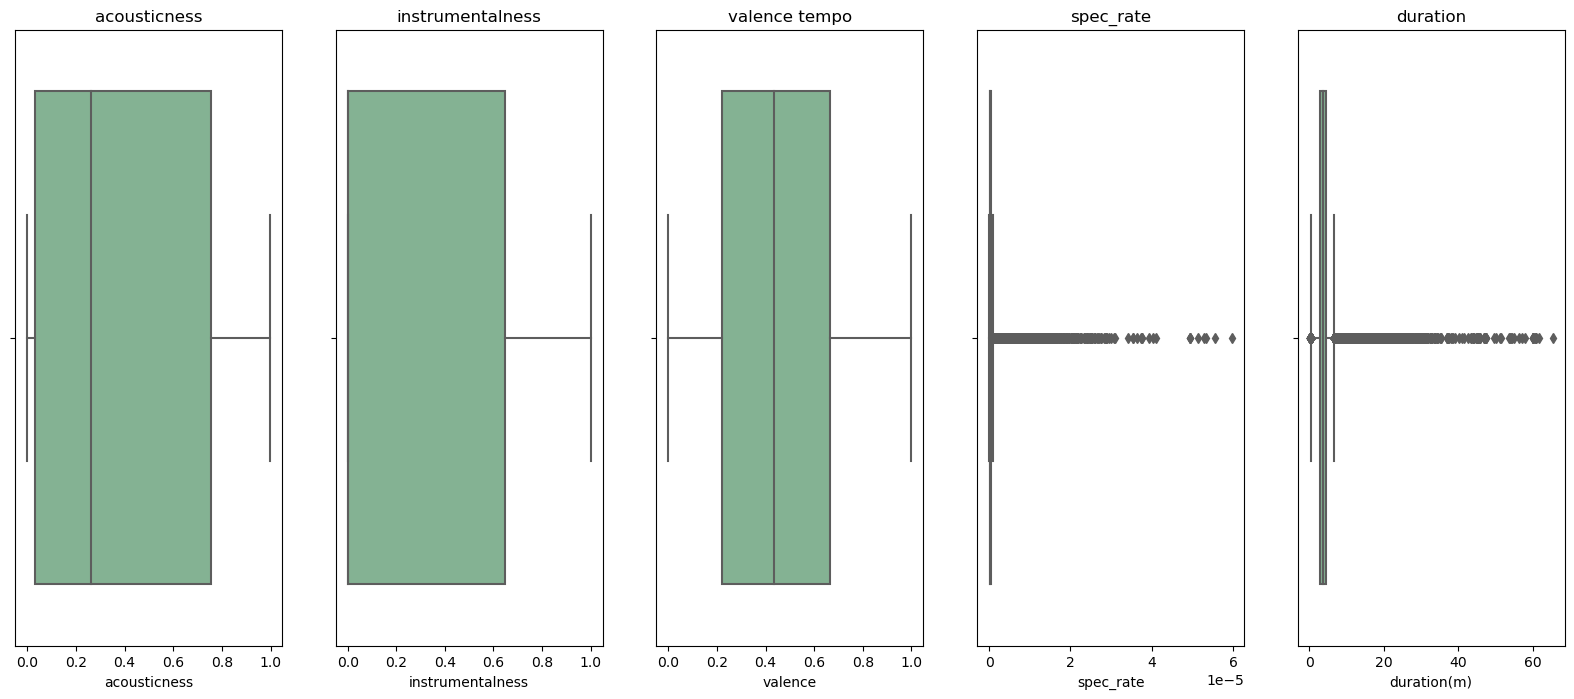

In [25]:
sns.set_palette('crest')
fig, axes = plt.subplots(1, 5, figsize=(20, 8))

#dance, energy, loudness, liveness, acousticness

sns.boxplot(data = df, x='acousticness', ax=axes[0])
axes[0].set_title('acousticness')

sns.boxplot(data = df, x='instrumentalness', ax=axes[1])
axes[1].set_title('instrumentalness')

sns.boxplot(data = df, x='valence', ax=axes[2])
axes[2].set_title('valence tempo')
            
sns.boxplot(data = df, x='spec_rate', ax=axes[3])
axes[3].set_title('spec_rate')
             
sns.boxplot(data = df, x='duration(m)', ax=axes[4])
axes[4].set_title('duration')

plt.show()

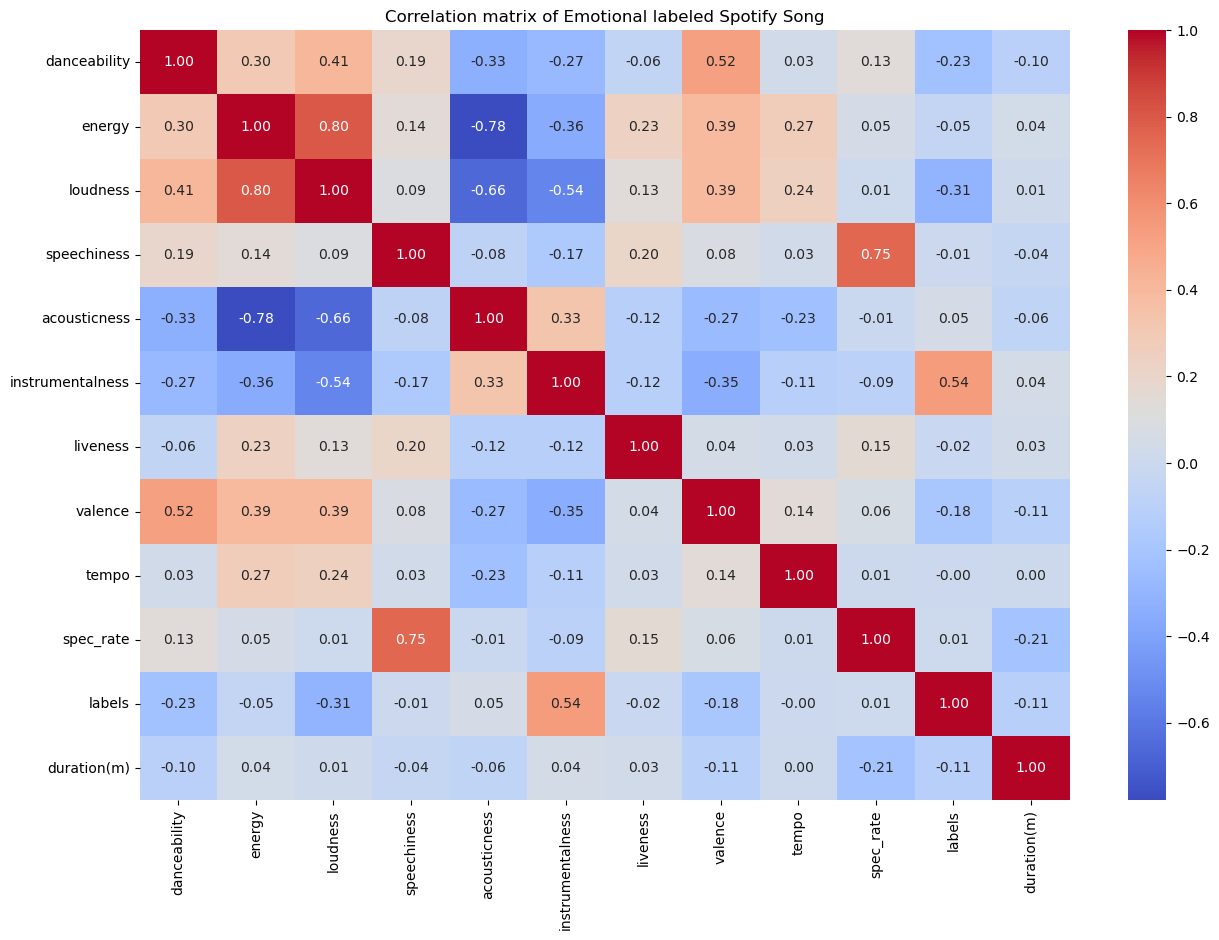

In [26]:
# Bivariate Analysis
# Correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation matrix of Emotional labeled Spotify Song')
plt.show()

The is no issue of multicollinearity because none of the column has higher correlation closer to 1

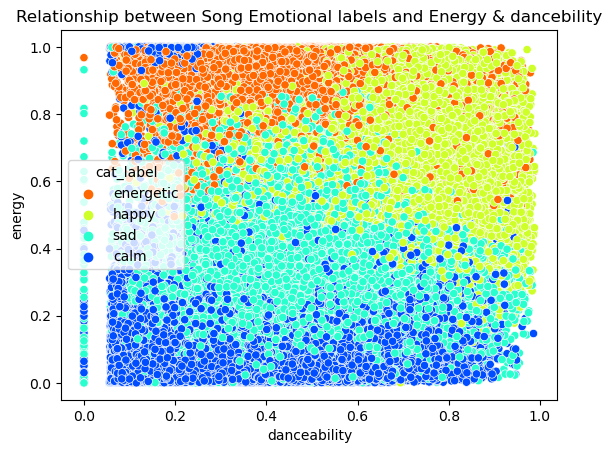

In [27]:
# Scatter plot for a pair of features
sns.scatterplot(x='danceability', y='energy', hue='cat_label', data=df, palette= 'jet_r')
plt.title('Relationship between Song Emotional labels and Energy & dancebility')
plt.show()

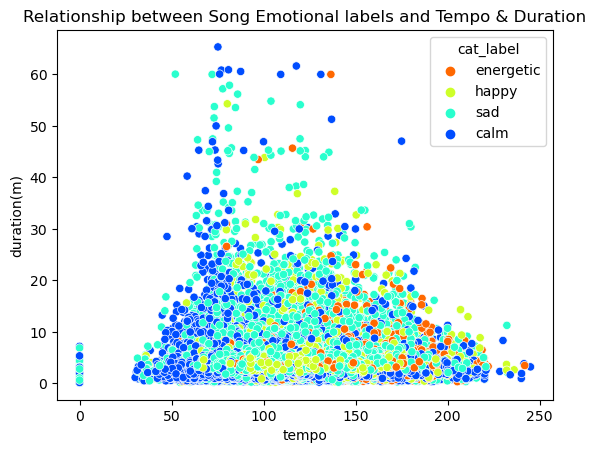

In [28]:
# Scatter plot for a pair of features
sns.scatterplot(x='tempo', y='duration(m)', hue='cat_label', data=df, palette= 'jet_r')
plt.title('Relationship between Song Emotional labels and Tempo & Duration')
plt.show()

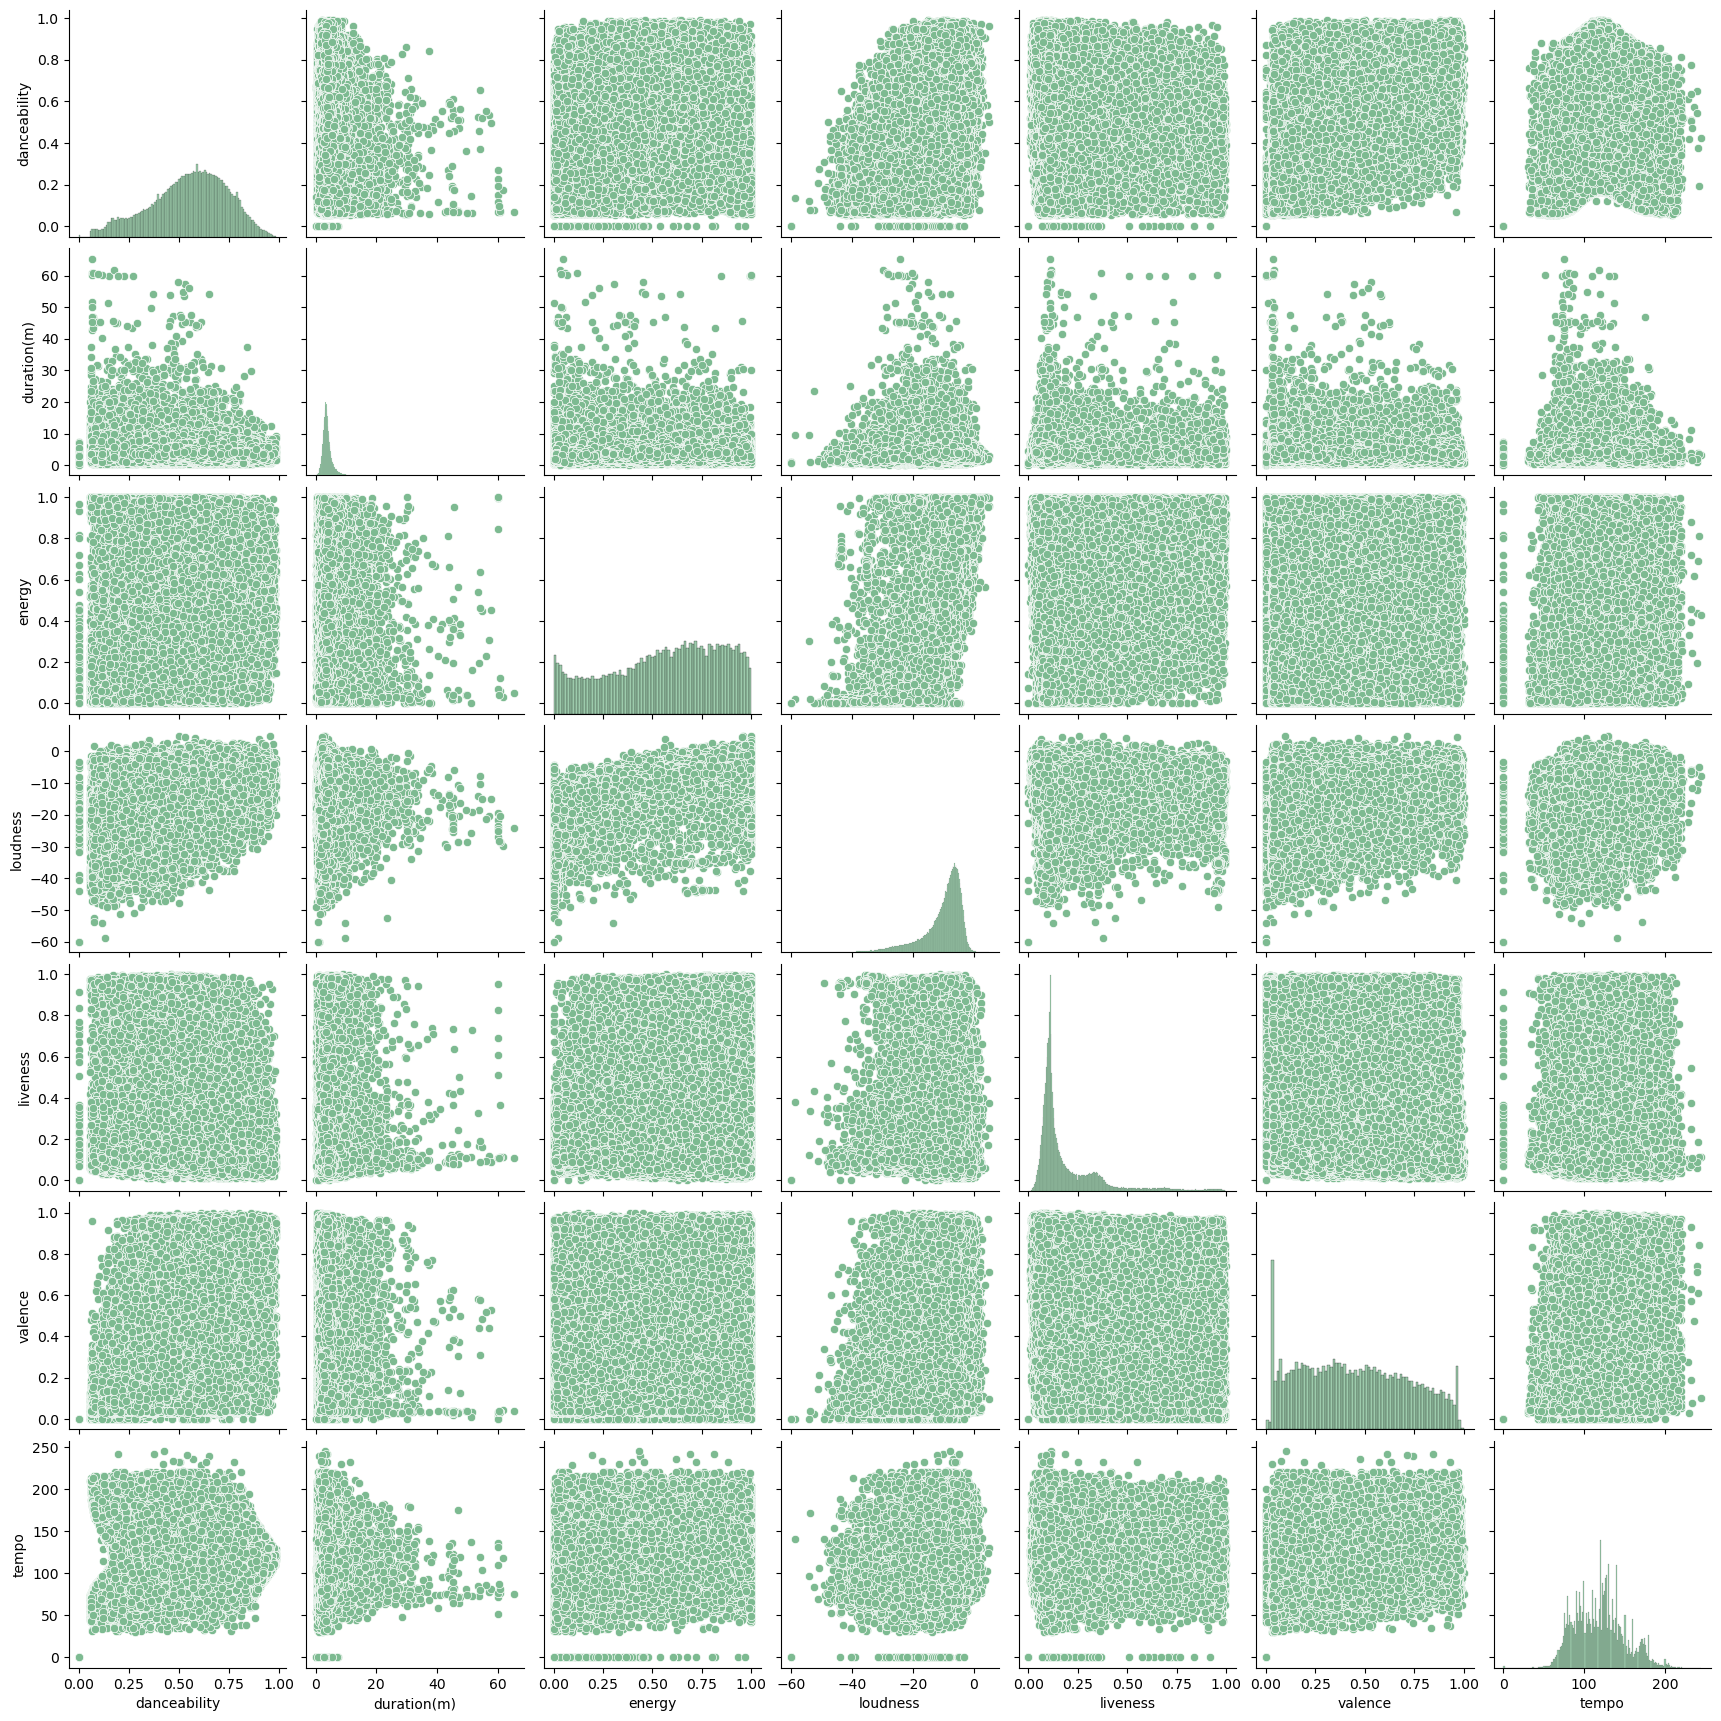

In [29]:
#pairplot of some selected features
selected_features=['danceability', 'duration(m)', 'energy', 'loudness', 'liveness', 'valence', 'tempo' ]
sns.pairplot(df[selected_features])
plt.show()

### General Insight from the Analysis

- The largest percentage of the data contain happy. 
- Energetic songs moderate dancebility, high energy, low duration and high tempo 
- Sad songs have low dancebility, low energy, moderate tempo and low duration
- Happy songs have high energy, high dancebility, low duration and moderate tempo
- Most of the Calm songs have high energy, high dancebility, high duration and moderate tempo
- There is a high correlation between loudness and energy
- Duration has little or no correlation with other features

### Prediction


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
df1 = df.drop('cat_label',axis=1)
df1

danceability  energy  loudness  speechiness  acousticness  \
0              0.611   0.614    -8.815       0.0672       0.01690   
1              0.638   0.781    -6.848       0.0285       0.01180   
2              0.560   0.810    -8.029       0.0872       0.00710   
3              0.525   0.699    -4.571       0.0353       0.01780   
4              0.367   0.771    -5.863       0.1060       0.36500   
...              ...     ...       ...          ...           ...   
277933         0.777   0.725    -9.012       0.0470       0.12600   
277934         0.543   0.482   -12.789       0.1940       0.08530   
277935         0.527   0.942    -5.640       0.0366       0.01150   
277936         0.768   0.829    -5.109       0.0313       0.09640   
277937         0.779   0.870   -13.141       0.0574       0.00644   

        instrumentalness  liveness  valence    tempo     spec_rate  labels  \
0               0.000794    0.7530    0.520  128.050  3.446154e-07       2   
1               0.009530    0.3490    0.250  122.985  1.464234e-07       1   
2               0.000008    0.2410    0.247  170.044  4.007850e-07       1   
3               0.000088    0.0888    0.199   92.011  7.959809e-08       0   
4               0.000001    0.0965    0.163  115.917  4.693131e-07       1   
...                  ...       ...      ...      ...           ...     ...   
277933          0.010800    0.0917    0.851  128.349  1.700680e-07       1   
277934          0.000092    0.1110    0.415  193.513  6.812444e-07       1   
277935          0.000000    0.1880    0.495  148.723  1.516740e-07       2   
277936          0.000029    0.0970    0.962  118.773  1.335706e-07       1   
277937          0.010700    0.0399    0.555  102.689  2.372685e-07       1   

        duration(m)  
0          3.250000  
1          3.244017  
2          3.626217  
3          7.391300  
4          3.764367  
...             ...  
277933     4.606000  
277934     4.746217  
277935     4.021783  
277936     3.905550  
277937     4.032000  

[276260 rows x 12 columns]

In [32]:
#splittingdata into test and train
X= df1.drop('labels', axis=1)
y= df1['labels']

In [33]:
X.head()

danceability  energy  loudness  speechiness  acousticness  \
0         0.611   0.614    -8.815       0.0672        0.0169   
1         0.638   0.781    -6.848       0.0285        0.0118   
2         0.560   0.810    -8.029       0.0872        0.0071   
3         0.525   0.699    -4.571       0.0353        0.0178   
4         0.367   0.771    -5.863       0.1060        0.3650   

   instrumentalness  liveness  valence    tempo     spec_rate  duration(m)  
0          0.000794    0.7530    0.520  128.050  3.446154e-07     3.250000  
1          0.009530    0.3490    0.250  122.985  1.464234e-07     3.244017  
2          0.000008    0.2410    0.247  170.044  4.007850e-07     3.626217  
3          0.000088    0.0888    0.199   92.011  7.959809e-08     7.391300  
4          0.000001    0.0965    0.163  115.917  4.693131e-07     3.764367

In [34]:
y.head()

0    2
1    1
2    1
3    0
4    1
Name: labels, dtype: int64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
X_train

danceability  energy  loudness  speechiness  acousticness  \
219739         0.491  0.7730    -4.545       0.0328      0.019900   
117985         0.527  0.0896   -18.975       0.0332      0.992000   
127043         0.733  0.6240    -9.601       0.0493      0.143000   
237678         0.141  0.0193   -33.141       0.0432      0.949000   
4012           0.730  0.3440    -6.847       0.0636      0.942000   
...              ...     ...       ...          ...           ...   
120373         0.548  0.9870    -3.710       0.0784      0.000133   
260652         0.607  0.5970    -8.919       0.0309      0.235000   
132462         0.560  0.1440   -13.844       0.0430      0.922000   
147449         0.767  0.7260    -7.914       0.0419      0.000100   
122460         0.754  0.6010    -8.594       0.0711      0.118000   

        instrumentalness  liveness  valence    tempo     spec_rate  \
219739          0.000000    0.1390   0.2960   85.964  1.280585e-07   
117985          0.826000    0.1070   0.0509  152.111  3.157514e-07   
127043          0.016000    0.3630   0.9210  120.415  1.409486e-07   
237678          0.653000    0.1080   0.0642   64.360  2.951324e-07   
4012            0.000000    0.7070   0.7260  134.543  3.644699e-07   
...                  ...       ...      ...      ...           ...   
120373          0.000303    0.3430   0.3810  104.084  4.149026e-07   
260652          0.005890    0.1450   0.4360  121.880  2.264732e-07   
132462          0.122000    0.1040   0.3280  121.347  1.076149e-07   
147449          0.924000    0.0983   0.0384  128.010  1.141096e-07   
122460          0.000236    0.1220   0.9040   66.862  4.332909e-07   

        duration(m)  
219739     4.268883  
117985     1.752433  
127043     5.829550  
237678     2.439583  
4012       2.908333  
...             ...  
120373     3.149333  
260652     2.274000  
132462     6.659550  
147449     6.119850  
122460     2.734883  

[221008 rows x 11 columns]

In [37]:
y_train

219739    0
117985    3
127043    1
237678    3
4012      0
         ..
120373    2
260652    0
132462    0
147449    2
122460    1
Name: labels, Length: 221008, dtype: int64

### Modelling

In [38]:
#import machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [39]:
#import Boosting Algorithms
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [40]:
# Import metrics
from sklearn.metrics import classification_report, confusion_matrix

              precision    recall  f1-score   support

           0       0.82      0.71      0.76     16314
           1       0.71      0.81      0.76     21149
           2       0.62      0.55      0.58      9310
           3       0.85      0.87      0.86      8479

    accuracy                           0.75     55252
   macro avg       0.75      0.74      0.74     55252
weighted avg       0.75      0.75      0.75     55252



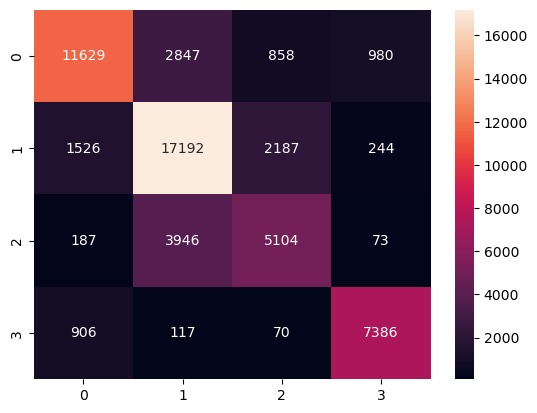

In [41]:
# Logistic Regression
lr= LogisticRegression()
lr.fit(X_train, y_train)
# prediction
y_pred_lr = lr.predict(X_test)

# evaluation
print(classification_report(y_test, y_pred_lr))
#Making plot for confusion metric
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d')
plt.show()

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     16314
           1       0.90      0.90      0.90     21149
           2       0.85      0.85      0.85      9310
           3       0.96      0.96      0.96      8479

    accuracy                           0.90     55252
   macro avg       0.91      0.91      0.91     55252
weighted avg       0.90      0.90      0.90     55252



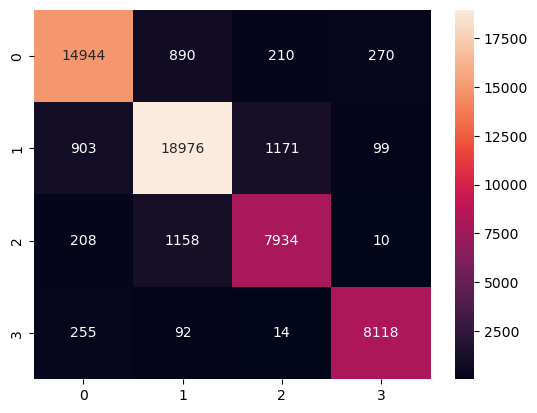

In [42]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# prediction
y_pred_dt = dt.predict(X_test)
# evealuation
print(classification_report(y_test, y_pred_dt))
# making a plot for confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d')
plt.show()

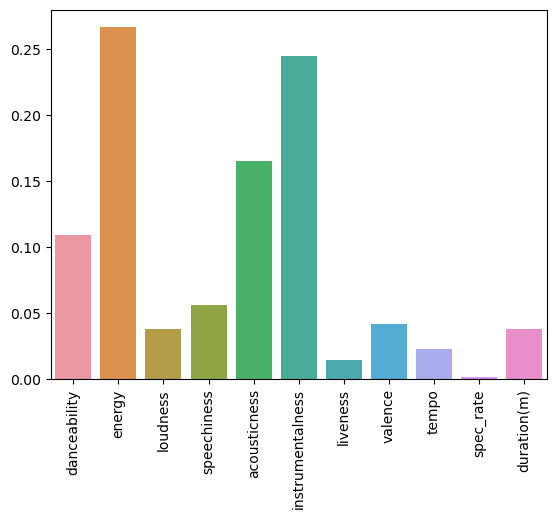

In [50]:
# feature importance plot
sns.barplot(x=X.columns, y=dt.feature_importances_)
plt.xticks(rotation=90)
plt.show()

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     16314
           1       0.93      0.95      0.94     21149
           2       0.92      0.88      0.90      9310
           3       0.97      0.97      0.97      8479

    accuracy                           0.94     55252
   macro avg       0.94      0.94      0.94     55252
weighted avg       0.94      0.94      0.94     55252



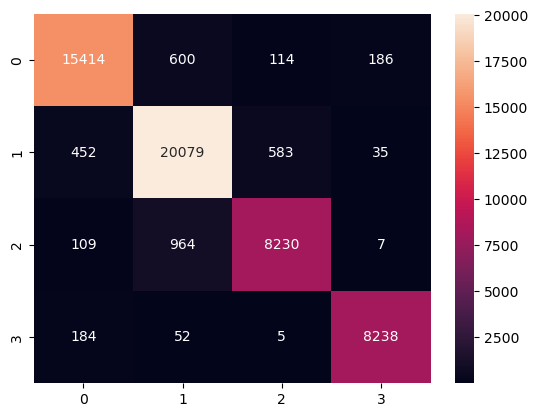

In [43]:
# random forest classifer
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# prediction
y_pred_rf = rf.predict(X_test)
# evealuation
print(classification_report(y_test, y_pred_rf))

# making a plot for confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')
plt.show()

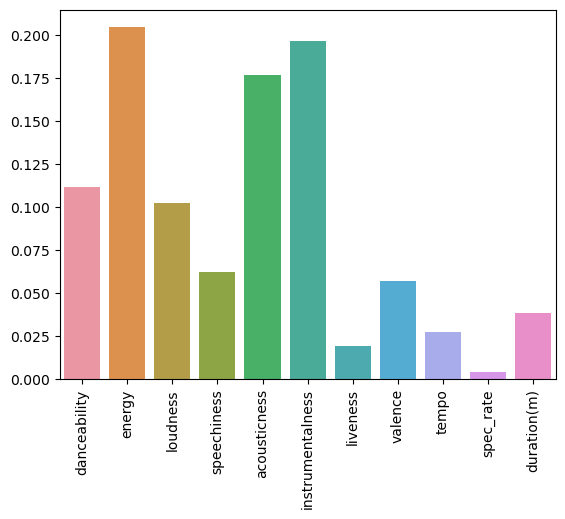

In [51]:
# feature importance plot
sns.barplot(x=X.columns, y=rf.feature_importances_)
plt.xticks(rotation=90)
plt.show()

              precision    recall  f1-score   support

           0       0.63      0.83      0.71     16314
           1       0.70      0.71      0.70     21149
           2       0.74      0.40      0.51      9310
           3       0.90      0.77      0.83      8479

    accuracy                           0.70     55252
   macro avg       0.74      0.67      0.69     55252
weighted avg       0.71      0.70      0.69     55252



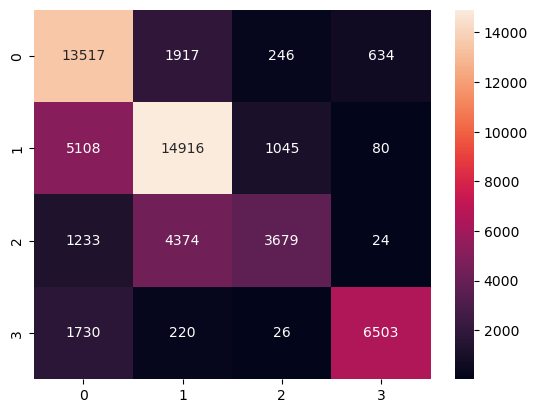

In [44]:
# Kneighbirs
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

# prediction
y_pred_knn = knn.predict(X_test)
# evealuation
print(classification_report(y_test, y_pred_knn))

# making a plot for confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d')
plt.show()

              precision    recall  f1-score   support

           0       0.85      0.75      0.80     16314
           1       0.80      0.79      0.79     21149
           2       0.66      0.83      0.74      9310
           3       0.91      0.92      0.91      8479

    accuracy                           0.80     55252
   macro avg       0.81      0.82      0.81     55252
weighted avg       0.81      0.80      0.80     55252



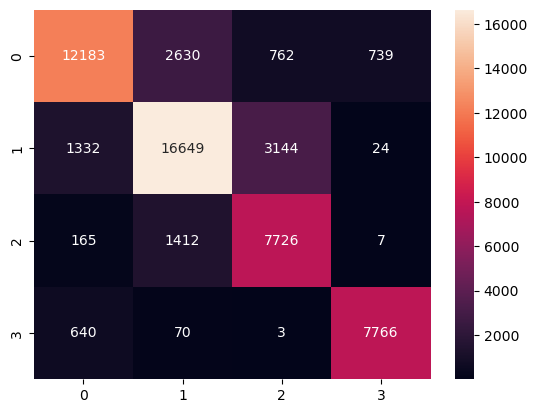

In [45]:
# gaussian
gbn = GaussianNB()
gbn.fit(X_train, y_train)

# prediction
y_pred_gbn = gbn.predict(X_test)
# evealuation
print(classification_report(y_test, y_pred_gbn))

# making a plot for confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_gbn), annot=True, fmt='d')
plt.show()

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     16314
           1       0.96      0.97      0.96     21149
           2       0.95      0.94      0.94      9310
           3       0.98      0.99      0.98      8479

    accuracy                           0.97     55252
   macro avg       0.97      0.97      0.97     55252
weighted avg       0.97      0.97      0.97     55252



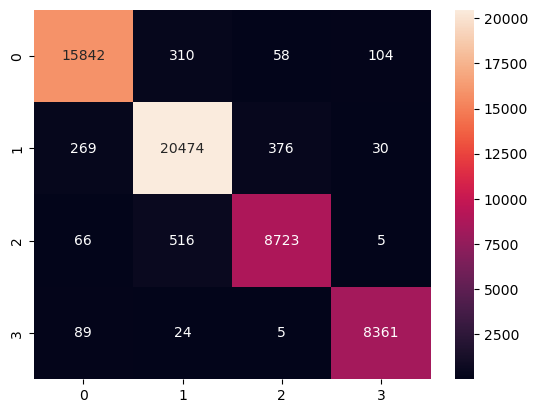

In [46]:
# Xgboost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# prediction
y_pred_xgb = xgb.predict(X_test)
# evealuation
print(classification_report(y_test, y_pred_xgb))

# making a plot for confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d')
plt.show()

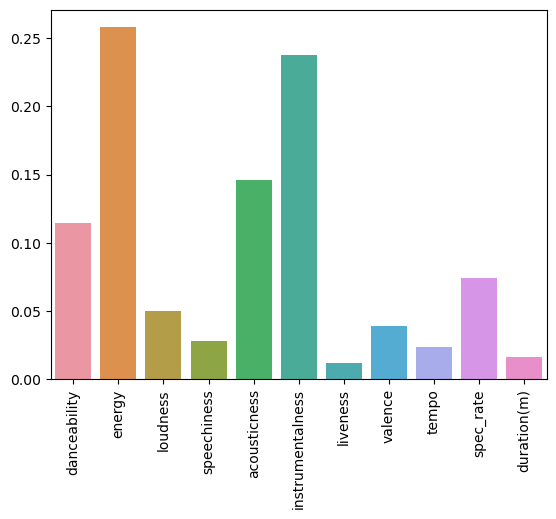

In [52]:
# feature importance plot
sns.barplot(x=X.columns, y=xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     16314
           1       0.96      0.97      0.96     21149
           2       0.95      0.94      0.94      9310
           3       0.98      0.98      0.98      8479

    accuracy                           0.96     55252
   macro avg       0.96      0.96      0.96     55252
weighted avg       0.96      0.96      0.96     55252



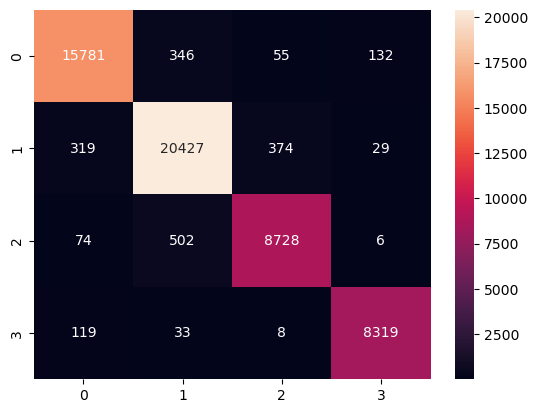

In [47]:
# catboost
cb = CatBoostClassifier(random_state=42, verbose=0)
cb.fit(X_train, y_train)

# prediction
y_pred_cb = cb.predict(X_test)
# evealuation
print(classification_report(y_test, y_pred_cb))

# making a plot for confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_cb), annot=True, fmt='d')
plt.show()

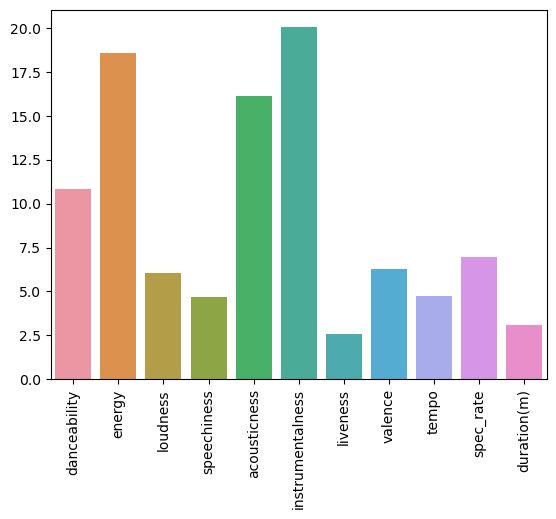

In [53]:
# feature importance plot
sns.barplot(x=X.columns, y=cb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     16314
           1       0.95      0.96      0.96     21149
           2       0.94      0.92      0.93      9310
           3       0.98      0.98      0.98      8479

    accuracy                           0.96     55252
   macro avg       0.96      0.96      0.96     55252
weighted avg       0.96      0.96      0.96     55252



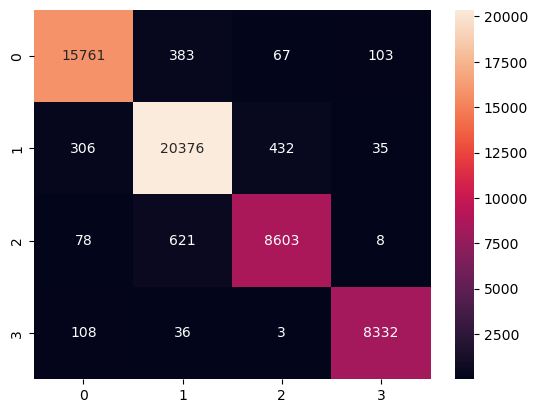

In [48]:
# LightGBM
lgbm = LGBMClassifier(random_state=42, verbose=0)
lgbm.fit(X_train, y_train)

# prediction
y_pred_lgbm = lgbm.predict(X_test)
# evealuation
print(classification_report(y_test, y_pred_lgbm))

# making a plot for confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lgbm), annot=True, fmt='d')
plt.show()

In [ ]:
# feature importance plot
sns.barplot(x=X.columns, y=lgbm.feature_importances_)
plt.xticks(rotation=90)
plt.show()

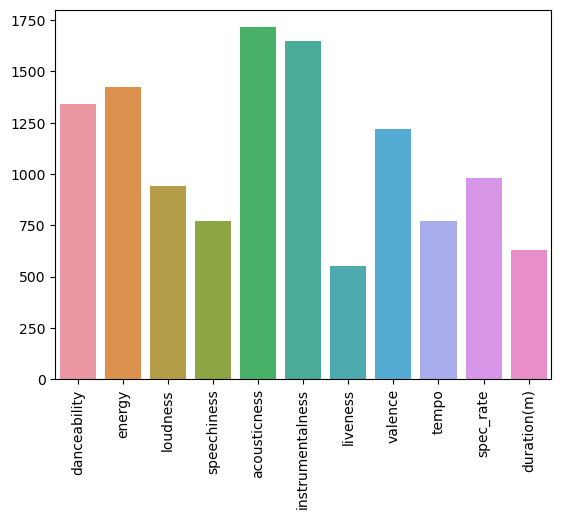

In [49]:
# feature importance plot
sns.barplot(x=X.columns, y=lgbm.feature_importances_)
plt.xticks(rotation=90)
plt.show()

### Feature Engineering

Here we going to engineer some futures and rhen train it on a model.

In [58]:
# copy from the original dataframe used for analysis to avoid modification
df1= df.copy()
df1.head()

danceability  energy  loudness  speechiness  acousticness  \
0         0.611   0.614    -8.815       0.0672        0.0169   
1         0.638   0.781    -6.848       0.0285        0.0118   
2         0.560   0.810    -8.029       0.0872        0.0071   
3         0.525   0.699    -4.571       0.0353        0.0178   
4         0.367   0.771    -5.863       0.1060        0.3650   

   instrumentalness  liveness  valence    tempo     spec_rate  labels  \
0          0.000794    0.7530    0.520  128.050  3.446154e-07       2   
1          0.009530    0.3490    0.250  122.985  1.464234e-07       1   
2          0.000008    0.2410    0.247  170.044  4.007850e-07       1   
3          0.000088    0.0888    0.199   92.011  7.959809e-08       0   
4          0.000001    0.0965    0.163  115.917  4.693131e-07       1   

   duration(m)  cat_label  
0     3.250000  energetic  
1     3.244017      happy  
2     3.626217      happy  
3     7.391300        sad  
4     3.764367      happy

In [59]:
# Categorize duration into short, medium and long time
# Categorize duration into short(1), medium(2), long(3)
df1['duration_cat'] = pd.cut(df['duration(m)'], bins=[0, 2.5, 4.5, np.inf], labels=['short', 'medium', 'long'])


In [60]:
# Loudness categories into quiet(1), moderate(2) and long(2)
df1['loudness_category'] = pd.cut(df1['loudness'], bins=[-np.inf, -20, -10, 0], labels=['quiet', 'moderate', 'loud'])

In [61]:
# High/Low Energy
energy_threshold = df1['energy'].median()
df1['high_energy'] = df1['energy'] > energy_threshold

In [68]:
df1.head(3)

danceability  energy  loudness  speechiness  acousticness  \
0         0.611   0.614    -8.815       0.0672        0.0169   
1         0.638   0.781    -6.848       0.0285        0.0118   
2         0.560   0.810    -8.029       0.0872        0.0071   

   instrumentalness  liveness  valence    tempo     spec_rate  labels  \
0          0.000794     0.753    0.520  128.050  3.446154e-07       2   
1          0.009530     0.349    0.250  122.985  1.464234e-07       1   
2          0.000008     0.241    0.247  170.044  4.007850e-07       1   

   duration(m)  cat_label duration_cat loudness_category  high_energy  
0     3.250000  energetic       medium              loud         True  
1     3.244017      happy       medium              loud         True  
2     3.626217      happy       medium              loud         True

In [72]:
df1.groupby('loudness_category')['cat_label'].count()

loudness_category
quiet        26924
moderate     79127
loud        169897
Name: cat_label, dtype: int64

In [75]:
df1.groupby(['high_energy', 'cat_label'])['cat_label'].count()

high_energy  cat_label
False        calm         41368
             energetic      992
             happy        28200
             sad          67778
True         calm           820
             energetic    45724
             happy        77528
             sad          13850
Name: cat_label, dtype: int64

In [77]:
df1.groupby('duration_cat')['cat_label'].count()

duration_cat
short      41526
medium    170178
long       64556
Name: cat_label, dtype: int64

<AxesSubplot:xlabel='high_energy', ylabel='count'>

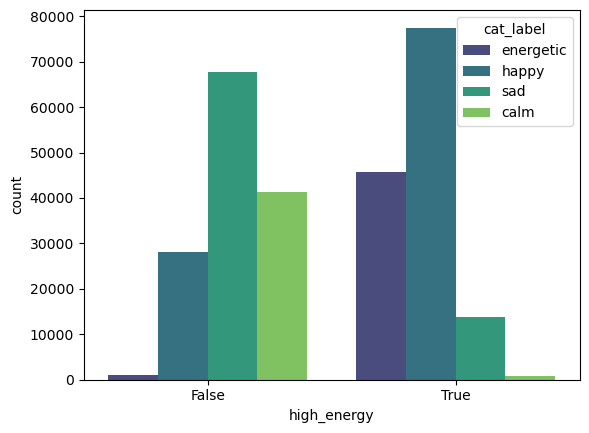

In [80]:
sns.countplot(x='high_energy', hue='cat_label', data=df1, palette='viridis')

<AxesSubplot:xlabel='duration_cat', ylabel='count'>

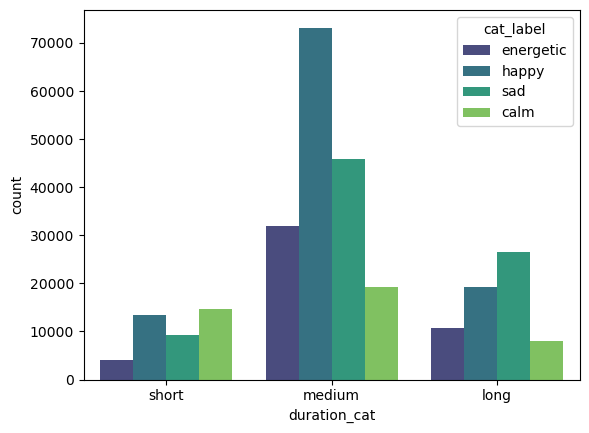

In [81]:
sns.countplot(x='duration_cat', hue='cat_label', data=df1, palette='viridis')

### Summary

- The largest percentage of the data contain happy label. 
- Energetic songs have moderate dancebility, high energy, low duration and high tempo 
- Sad songs have low dancebility, low energy, moderate tempo and low duration
- Happy songs have high energy, high dancebility, low duration and moderate tempo
- Most of the Calm songs have high energy, high danceability, high duration and moderate tempo
- There is a high correlation between loudness and energy
- Duration has little or no correlation with other features


In [84]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [93]:
# Encode categorical features
cat_cols = ['duration_cat', 'loudness_category']
for col in cat_cols:
    df1[col] = LabelEncoder().fit_transform(df1[col])

In [95]:
# Convert boolean features to integers
df1['high_energy'] = df1['high_energy'].astype(int)

In [104]:
df1.head(3)

danceability  energy  loudness  speechiness  acousticness  \
0         0.611   0.614    -8.815       0.0672        0.0169   
1         0.638   0.781    -6.848       0.0285        0.0118   
2         0.560   0.810    -8.029       0.0872        0.0071   

   instrumentalness  liveness  valence    tempo     spec_rate  labels  \
0          0.000794     0.753    0.520  128.050  3.446154e-07       2   
1          0.009530     0.349    0.250  122.985  1.464234e-07       1   
2          0.000008     0.241    0.247  170.044  4.007850e-07       1   

   duration(m)  duration_cat  loudness_category  high_energy  
0     3.250000             1                  0            1  
1     3.244017             1                  0            1  
2     3.626217             1                  0            1

In [105]:
# Multiplying high_energy, loudness category and duration cat
df1['duration_cat_m_loudness_category'] = df1['duration_cat'] * df1['loudness_category']
df1['loudness_category_m_high_energy'] = df1['loudness_category'] * df1['high_energy']
df1['high_energy_m_duration_cat'] = df1['duration_cat'] * df1['high_energy']

In [119]:
# drop the original columns (duration(m), energy, loudness)

df1.drop(columns=['duration(m)', 'energy', 'loudness'], axis=1, inplace=True)

In [120]:
df1.head(2)

danceability  speechiness  acousticness  instrumentalness  liveness  \
0         0.611       0.0672        0.0169          0.000794     0.753   
1         0.638       0.0285        0.0118          0.009530     0.349   

   valence    tempo     spec_rate  labels  duration_cat  loudness_category  \
0     0.52  128.050  3.446154e-07       2             1                  0   
1     0.25  122.985  1.464234e-07       1             1                  0   

   high_energy  duration_cat_m_loudness_category  \
0            1                                 0   
1            1                                 0   

   loudness_category_m_high_energy  high_energy_m_duration_cat  
0                                0                           1  
1                                0                           1

In [121]:
# Splitting data
X1 = df1.drop('labels', axis= 1)
y1 = df1['labels']

In [122]:
#Split into trai and test data
X1_train, X1_test, y1_train, y1_test= train_test_split(X1, y1, test_size=0.2, random_state=42)

In [123]:
# Feature scaling
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

### Training model

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     16314
           1       0.90      0.92      0.91     21149
           2       0.89      0.85      0.87      9310
           3       0.96      0.97      0.96      8479

    accuracy                           0.91     55252
   macro avg       0.92      0.91      0.92     55252
weighted avg       0.91      0.91      0.91     55252



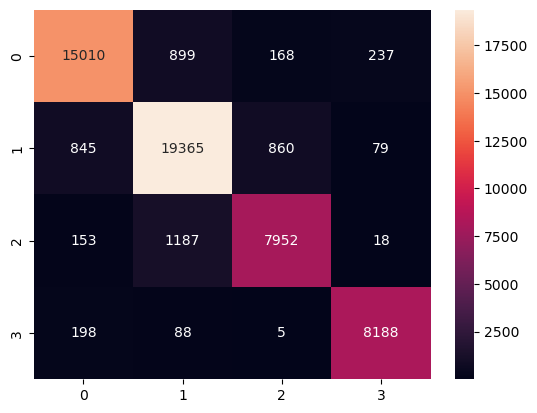

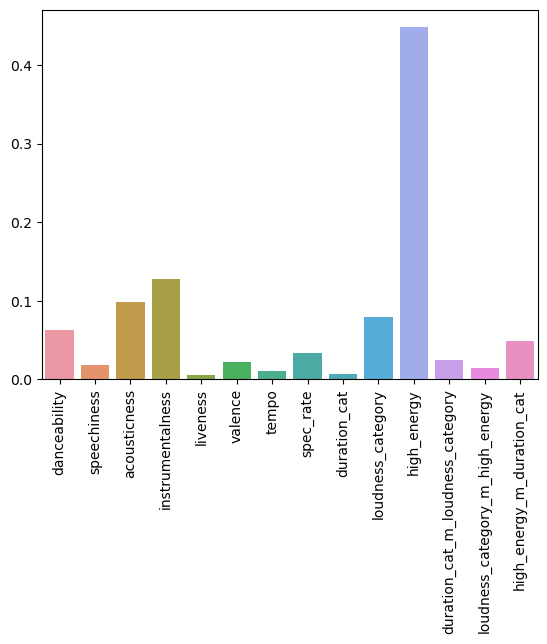

In [128]:
# Xgboost
xgb1 = XGBClassifier()
xgb1.fit(X1_train_scaled, y1_train)

# prediction
y_pred_xgb1 = xgb1.predict(X1_test_scaled)
# evealuation
print(classification_report(y1_test, y_pred_xgb1))

# making a plot for confusion matrix
sns.heatmap(confusion_matrix(y1_test, y_pred_xgb1), annot=True, fmt='d')
plt.show()
# feature importance plot

sns.barplot(x=X1.columns, y=xgb1.feature_importances_)
plt.xticks(rotation=90)
plt.show()


              precision    recall  f1-score   support

           0       0.92      0.92      0.92     16314
           1       0.90      0.92      0.91     21149
           2       0.89      0.85      0.87      9310
           3       0.96      0.96      0.96      8479

    accuracy                           0.91     55252
   macro avg       0.92      0.91      0.92     55252
weighted avg       0.91      0.91      0.91     55252



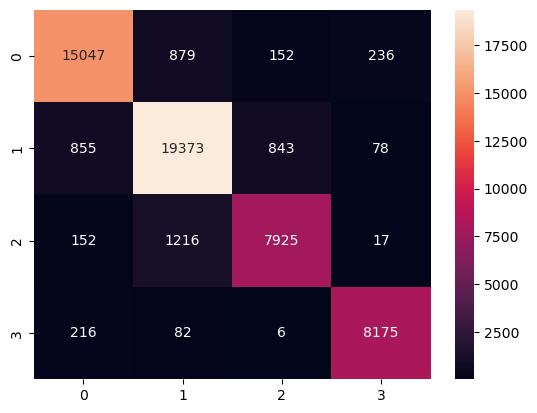

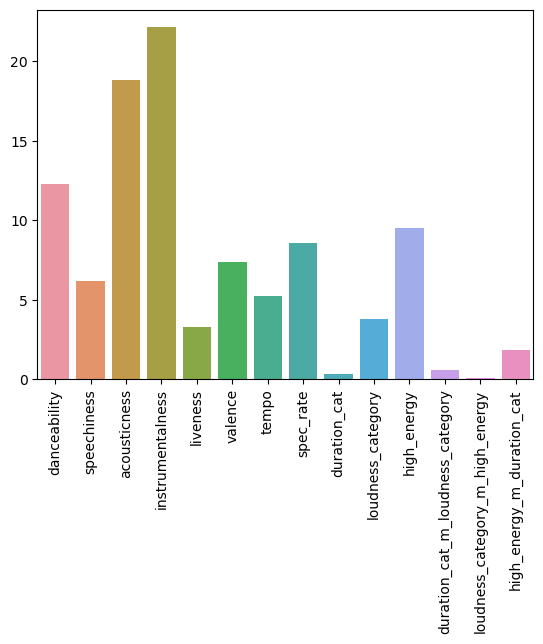

In [131]:
# catboost

cb1 = CatBoostClassifier(random_state=42, verbose=0)
cb1.fit(X1_train_scaled, y1_train)

# prediction
y_pred_cb1 = cb1.predict(X1_test_scaled)
# evealuation
print(classification_report(y1_test, y_pred_cb1))

# making a plot for confusion matrix
sns.heatmap(confusion_matrix(y1_test, y_pred_cb1), annot=True, fmt='d')
plt.show()
# feature importance plot

sns.barplot(x=X1.columns, y=cb1.feature_importances_)
plt.xticks(rotation=90)
plt.show()

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     16314
           1       0.90      0.91      0.91     21149
           2       0.88      0.85      0.87      9310
           3       0.96      0.96      0.96      8479

    accuracy                           0.91     55252
   macro avg       0.92      0.91      0.91     55252
weighted avg       0.91      0.91      0.91     55252



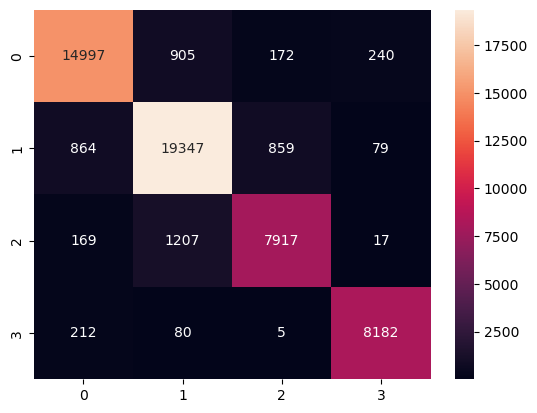

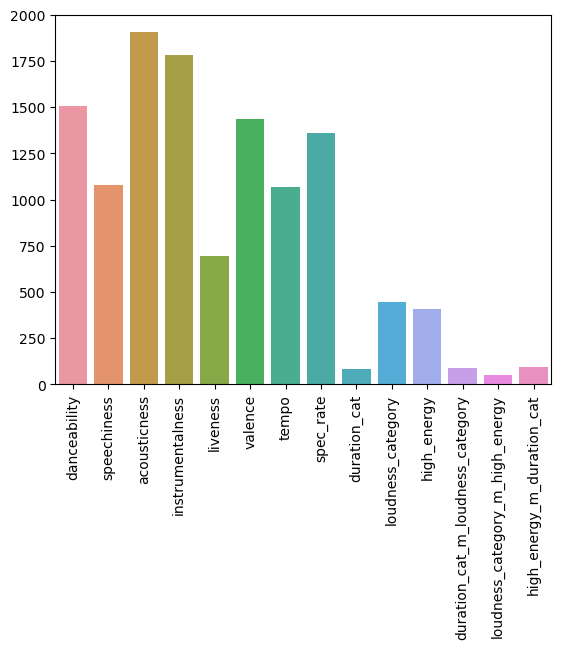

In [132]:
# LightGBM
lgbm1 = LGBMClassifier(random_state=42, verbose=0)
lgbm1.fit(X_train, y_train)

lgbm1.fit(X1_train_scaled, y1_train)

# prediction
y_pred_lgbm1 = lgbm1.predict(X1_test_scaled)
# evealuation
print(classification_report(y1_test, y_pred_lgbm1))

# making a plot for confusion matrix
sns.heatmap(confusion_matrix(y1_test, y_pred_lgbm1), annot=True, fmt='d')
plt.show()
# feature importance plot

sns.barplot(x=X1.columns, y=lgbm1.feature_importances_)
plt.xticks(rotation=90)
plt.show()

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     16314
           1       0.89      0.91      0.90     21149
           2       0.88      0.83      0.86      9310
           3       0.96      0.96      0.96      8479

    accuracy                           0.91     55252
   macro avg       0.91      0.90      0.91     55252
weighted avg       0.91      0.91      0.91     55252



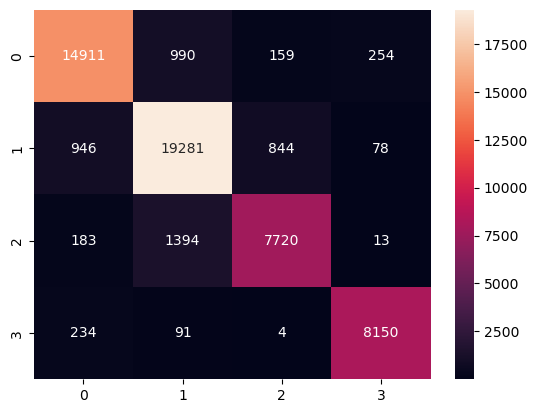

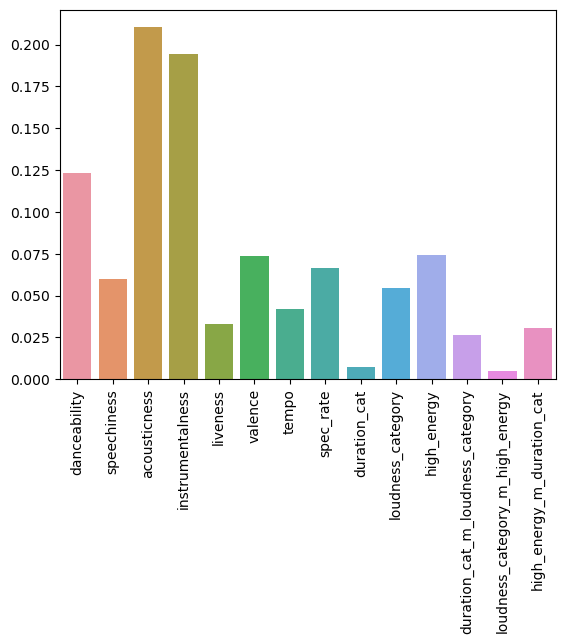

In [133]:
# random forest classifer
rf1 = RandomForestClassifier()
rf1.fit(X1_train_scaled, y1_train)

# prediction
y_pred_rf1 = rf1.predict(X1_test_scaled)
# evealuation
print(classification_report(y1_test, y_pred_rf1))

# making a plot for confusion matrix
sns.heatmap(confusion_matrix(y1_test, y_pred_rf1), annot=True, fmt='d')
plt.show()
# feature importance plot

sns.barplot(x=X1.columns, y=rf1.feature_importances_)
plt.xticks(rotation=90)
plt.show()

              precision    recall  f1-score   support

           0       0.79      0.76      0.77     16314
           1       0.82      0.52      0.63     21149
           2       0.49      0.91      0.64      9310
           3       0.87      0.94      0.90      8479

    accuracy                           0.72     55252
   macro avg       0.74      0.78      0.74     55252
weighted avg       0.76      0.72      0.72     55252



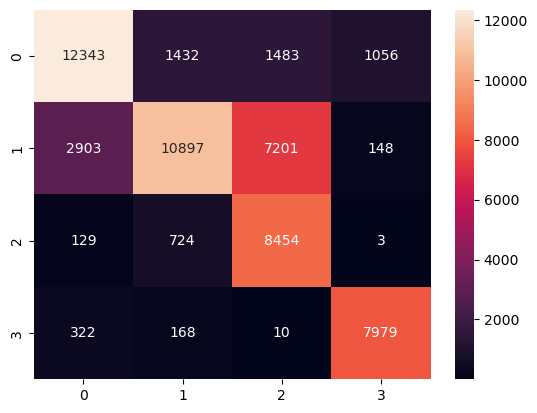

In [135]:
# gaussian
gbn1 = GaussianNB()
gbn1.fit(X1_train_scaled, y1_train)

# prediction
y_pred_gbn1 = gbn1.predict(X1_test_scaled)
# evaluation
print(classification_report(y1_test, y_pred_gbn1))

# making a plot for confusion matrix
sns.heatmap(confusion_matrix(y1_test, y_pred_gbn1), annot=True, fmt='d')
plt.show()

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     16314
           1       0.90      0.92      0.91     21149
           2       0.89      0.85      0.87      9310
           3       0.96      0.97      0.96      8479

    accuracy                           0.91     55252
   macro avg       0.92      0.91      0.92     55252
weighted avg       0.91      0.91      0.91     55252



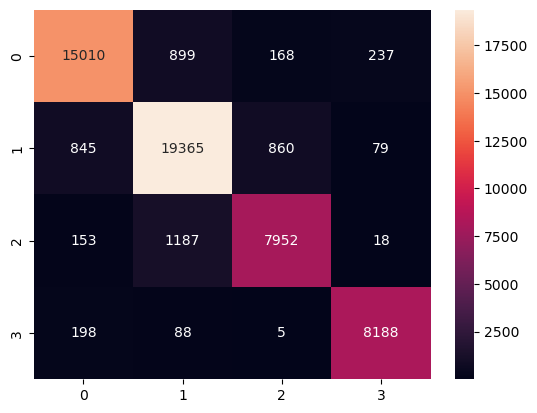

In [136]:
# LogisticRegression
lr1 = LogisticRegression()
lr1.fit(X1_train_scaled, y1_train)

# prediction
y_pred_lr1 = xgb1.predict(X1_test_scaled)
# evealuation
print(classification_report(y1_test, y_pred_lr1))

# making a plot for confusion matrix
sns.heatmap(confusion_matrix(y1_test, y_pred_lr1), annot=True, fmt='d')
plt.show()

              precision    recall  f1-score   support

           0       0.87      0.87      0.87     16314
           1       0.85      0.85      0.85     21149
           2       0.79      0.80      0.79      9310
           3       0.95      0.94      0.94      8479

    accuracy                           0.86     55252
   macro avg       0.86      0.86      0.86     55252
weighted avg       0.86      0.86      0.86     55252



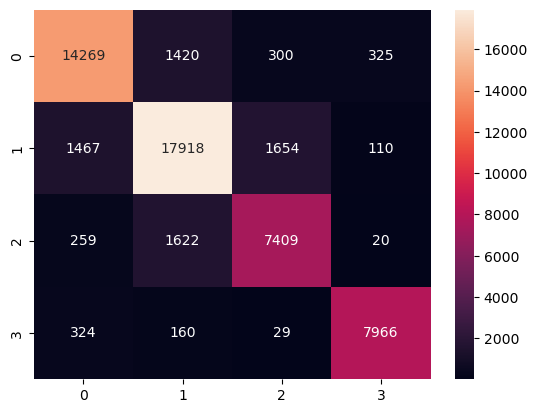

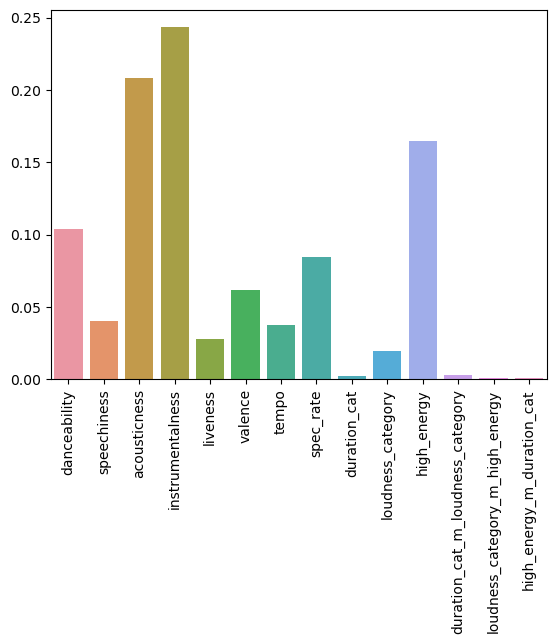

In [130]:
# Decision Tree
dt1 = DecisionTreeClassifier()
dt1.fit(X1_train_scaled, y1_train)

# prediction
y_pred_dt1 = dt1.predict(X1_test_scaled)
# evealuation
print(classification_report(y1_test, y_pred_dt1))

# making a plot for confusion matrix
sns.heatmap(confusion_matrix(y1_test, y_pred_dt1), annot=True, fmt='d')
plt.show()
# feature importance plot

sns.barplot(x=X1.columns, y=dt1.feature_importances_)
plt.xticks(rotation=90)
plt.show()

### Result from the model

Key factors influencing songs emotion prediction include energy, instrumentalness and danceability. Interestingly, duration do not appear to have any correlation with other features and classification of emotion

Thank you!